In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import uniform

# **BARCELONA**

In [ ]:
barcelona_data = pd.read_csv('DATASETS/barcelona_data.csv.gz')

In [ ]:
barcelona_data.head()

id                         listing_url       scrape_id last_scraped  \
0  18674  https://www.airbnb.com/rooms/18674  20241212051318   2024-12-12   
1  23197  https://www.airbnb.com/rooms/23197  20241212051318   2024-12-12   
2  32711  https://www.airbnb.com/rooms/32711  20241212051318   2024-12-12   
3  34241  https://www.airbnb.com/rooms/34241  20241212051318   2024-12-12   
4  34981  https://www.airbnb.com/rooms/34981  20241212051318   2024-12-12   

        source                                               name  \
0  city scrape    Huge flat for 8 people close to Sagrada Familia   
1  city scrape  Forum CCIB DeLuxe, Spacious, Large Balcony, relax   
2  city scrape                   Sagrada Familia area - Còrsega 1   
3  city scrape   Stylish Top Floor Apartment - Ramblas Plaza Real   
4  city scrape               VIDRE HOME PLAZA REAL on LAS RAMBLAS   

                                         description  \
0  110m2 apartment to rent in Barcelona. Located ...   
1  Beautiful and Spacious Apartment with Large Te...   
2  A lovely two bedroom apartment only 250 m from...   
3  Located in close proximity to Plaza Real and L...   
4  Spacious apartment for large families or group...   

                               neighborhood_overview  \
0  Apartment in Barcelona located in the heart of...   
1  Strategically located in the Parc del Fòrum, a...   
2  What's nearby  <br />This apartment is located...   
3                                                NaN   
4  Located in Ciutat Vella in the Gothic Quarter,...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/13031453/413c...    71615  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...    90417  ...   
2  https://a0.muscache.com/pictures/357b25e4-f414...   135703  ...   
3  https://a0.muscache.com/pictures/2437facc-2fe7...    73163  ...   
4  https://a0.muscache.com/pictures/c4d1723c-e479...    73163  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.70                   4.80                4.32   
1                        4.99                   4.63                4.65   
2                        4.88                   4.88                4.47   
3                        4.68                   4.73                4.23   
4                        4.70                   4.66                4.43   

       license instant_bookable calculated_host_listings_count  \
0  HUTB-002062                t                             29   
1   HUTB005057                f                              1   
2  HUTB-001722                f                              3   
3       Exempt                f                              3   
4  HUTB-150671                f                              3   

  calculated_host_listings_count_entire_homes  \
0                                          29   
1                                           1   
2                                           3   
3                                           3   
4                                           3   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.32  
1                                           0              0.48  
2                                           0              0.84  
3                                           0              0.14  
4                                           0              1.46  

[5 rows x 75 columns]

In [ ]:
print(barcelona_data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## Data Optimization

### Null Values

In [ ]:
# Calculate missing values and their percentage
missing_values = barcelona_data.isnull().sum()
missing_percent = (missing_values / len(barcelona_data)) * 100

# Create a DataFrame and sort it from highest to lowest missing percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Keep only columns with missing values
missing_data = missing_data.sort_values(by='Percentage (%)', ascending=False)

# Display all rows
pd.set_option('display.max_rows', None)
print("Missing Values per Column (sorted by percentage):")
print(missing_data)


Missing Values per Column (sorted by percentage):
                             Missing Values  Percentage (%)
calendar_updated                      19455      100.000000
host_neighbourhood                     9811       50.429196
neighbourhood                          9664       49.673606
neighborhood_overview                  9664       49.673606
host_about                             7214       37.080442
license                                6253       32.140838
review_scores_checkin                  4994       25.669494
review_scores_value                    4993       25.664354
review_scores_location                 4993       25.664354
review_scores_accuracy                 4993       25.664354
review_scores_cleanliness              4992       25.659214
review_scores_communication            4991       25.654074
review_scores_rating                   4990       25.648933
last_review                            4990       25.648933
first_review                           4990       

In [ ]:
# Remove columns with more than 49% missing values, (TO DECIDE WHAT THRESHOLD WE APPLY)
threshold = 49
filtered_columns = missing_percent[missing_percent < threshold].index
df_barcelona = barcelona_data[filtered_columns]
print("\nRemaining columns after removing those with more than 49% missing values:")
print(df_barcelona.columns)


Remaining columns after removing those with more than 49% missing values:
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm',

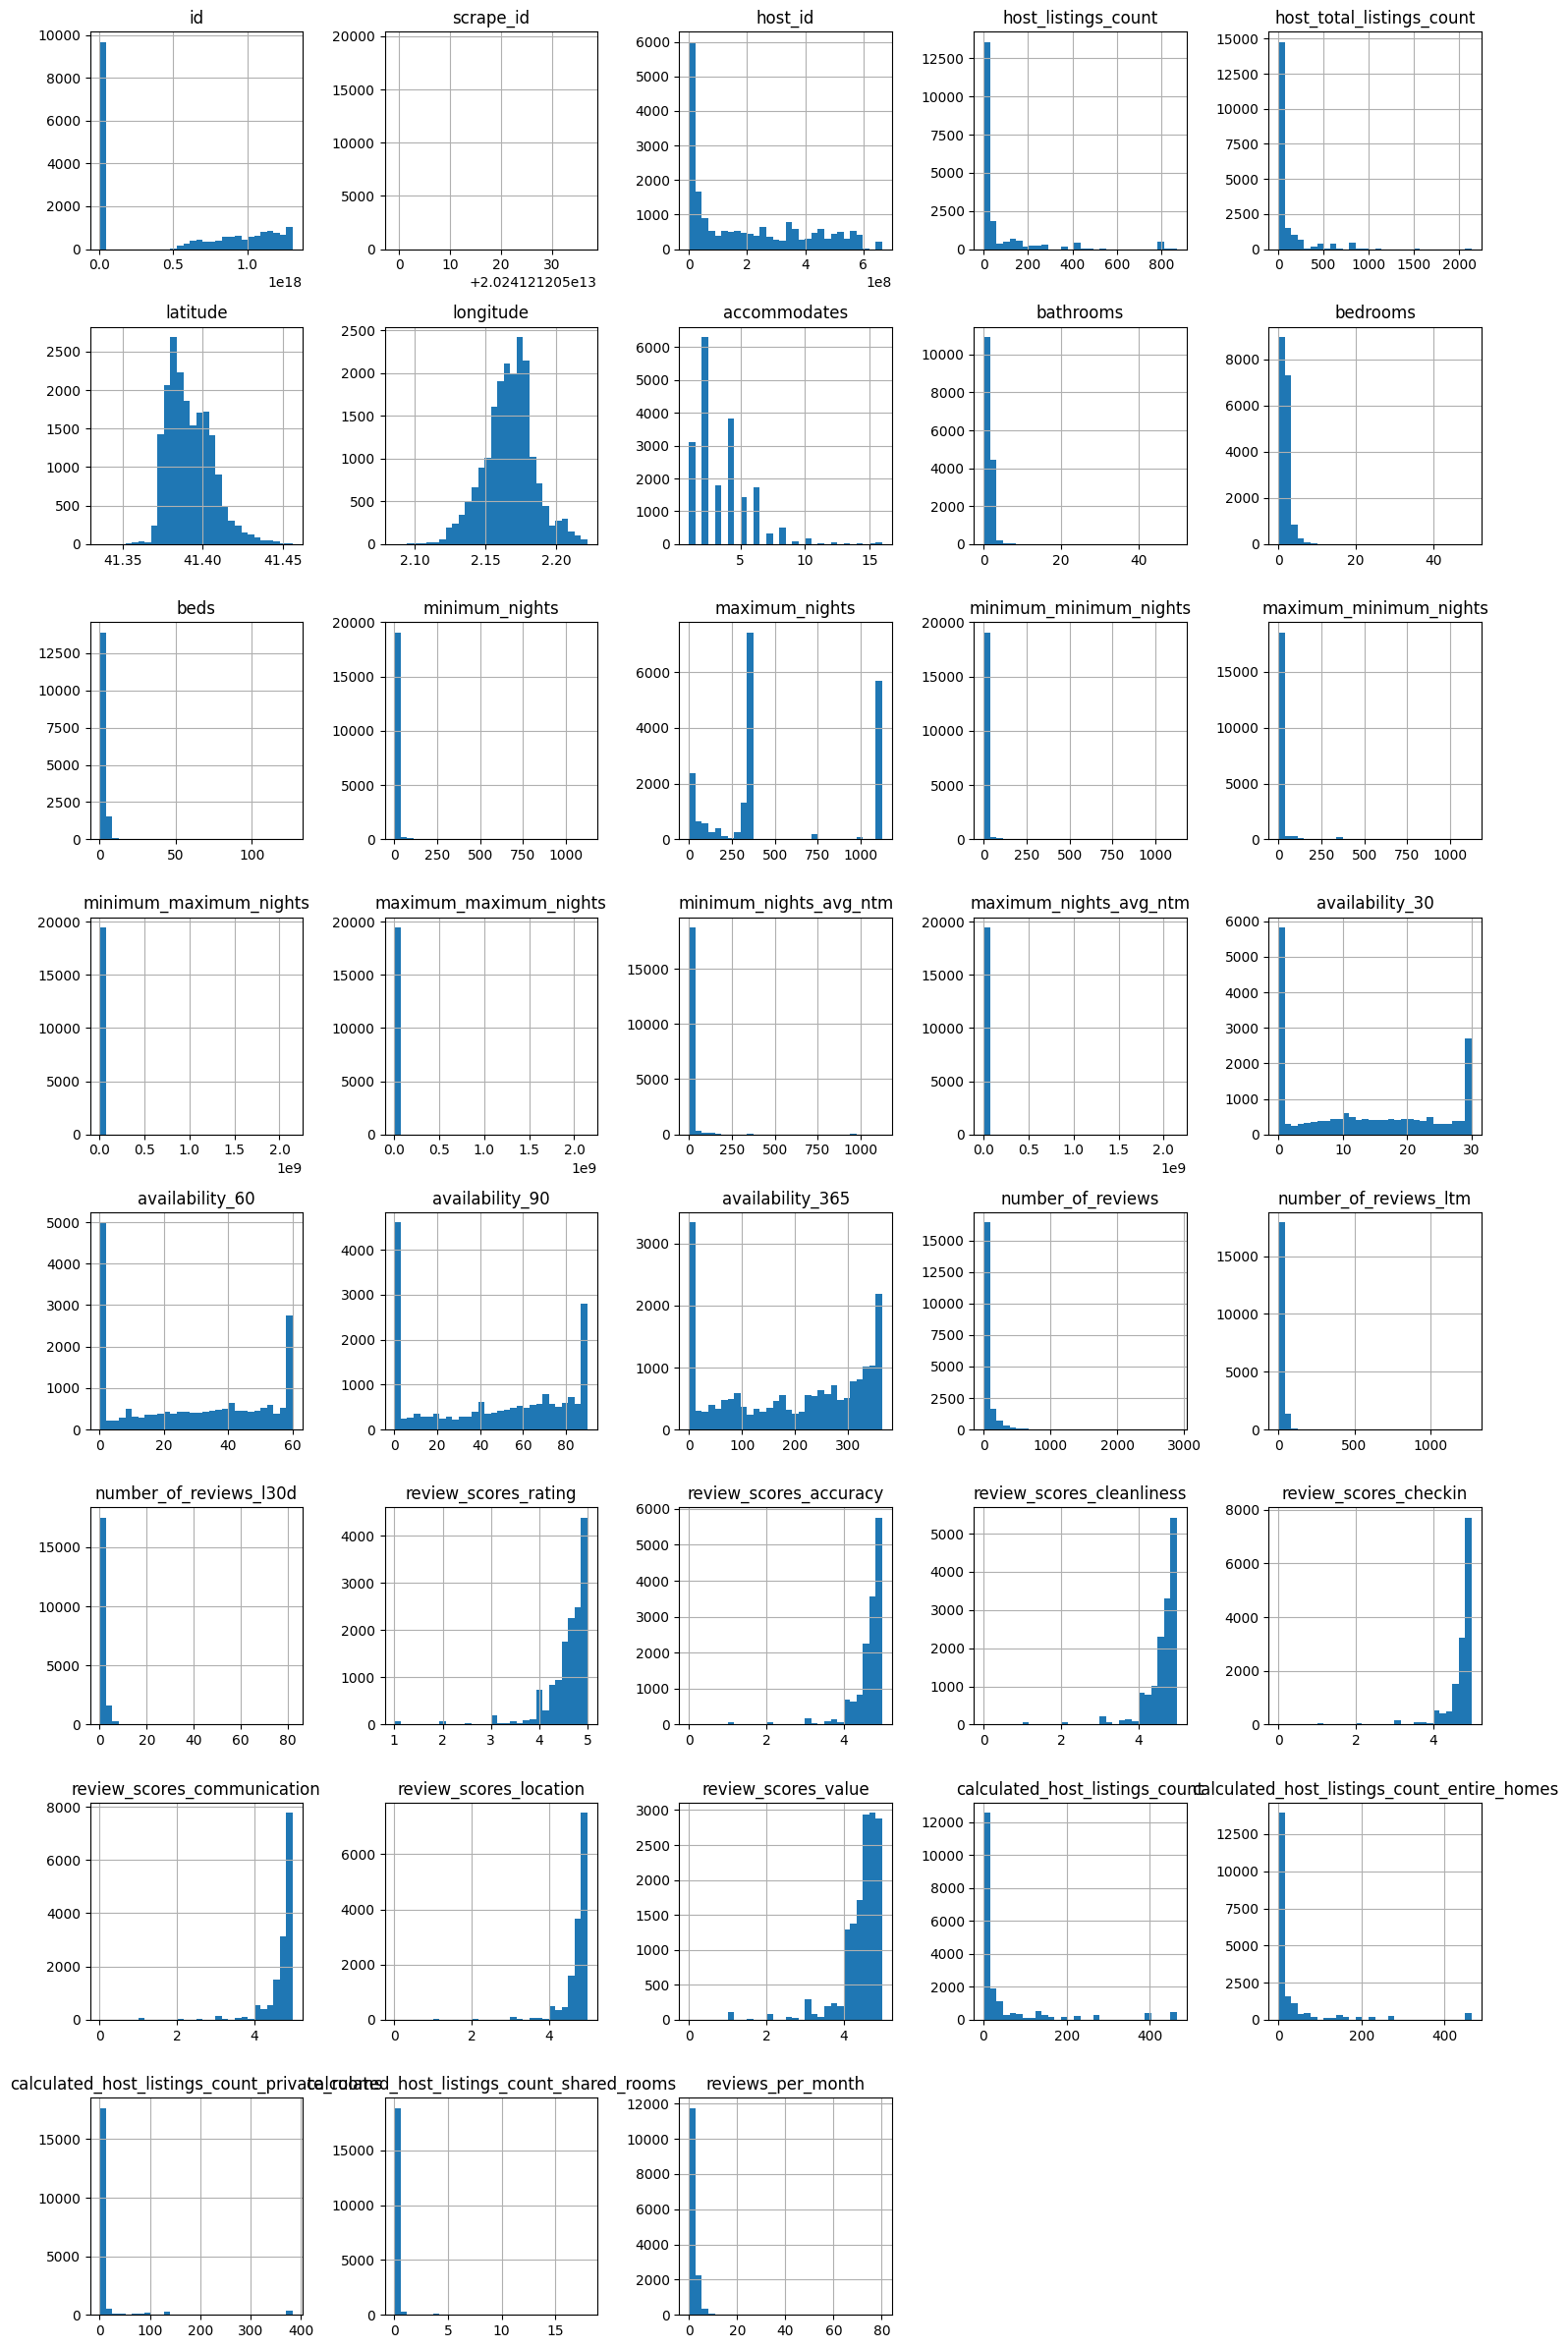

In [ ]:
# Select only numeric columns
numeric_cols = df_barcelona.select_dtypes(include=['number']).columns.tolist()

# Calculate the number of rows and columns needed for the grid
num_cols = len(numeric_cols)
ncols = 5  # Set number of columns per row
nrows = (num_cols // ncols) + (num_cols % ncols > 0)  # Calculate rows needed

# Plot the histograms with the adjusted layout
df_barcelona[numeric_cols].hist(figsize=(15, nrows*3), bins=30, layout=(nrows, ncols))
plt.tight_layout()
plt.show()



- We have decided to impute numerical variables using the median because of the presence of skewness and outliers. Median imputation is more robust in these cases, as it is not affected by extreme values. This approach ensures that the imputed values better represent the central tendency of the data without being distorted by outliers.

- For most categorical variables, we decided that mode imputation is the best default choice, as it maintains consistency with the dataset. However, if the missing values have a potential meaning, an "Unknown" category was also used.

In [ ]:
# Clean 'price' column by removing '$' and ',' and converting to float
df_barcelona['price'] = df_barcelona['price'].replace({'\\$':'', ',':''}, regex=True).astype(float)

<ipython-input-100-c6f52ee98025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barcelona['price'] = df_barcelona['price'].replace({'\\$':'', ',':''}, regex=True).astype(float)


In [ ]:
# Group by 'neighbourhood_cleansed' and calculate the median price
neighbourhood_price_median = df_barcelona.groupby('neighbourhood_group_cleansed')['price'].median()

# Fill missing 'price' values with the mean of the respective 'neighbourhood_group_cleansed'
df_barcelona['price'] = df_barcelona.apply(
    lambda row: neighbourhood_price_median[row['neighbourhood_group_cleansed']] if pd.isnull(row['price']) else row['price'],
    axis=1
)

# Check if missing values in 'price' are filled
remaining_missing_values = df_barcelona['price'].isnull().sum()
print(f"Remaining missing values in 'price': {remaining_missing_values}")

Remaining missing values in 'price': 0


<ipython-input-101-a8c50e53e5aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barcelona['price'] = df_barcelona.apply(


In [ ]:
# Drop rows where 'price' is still missing
df_barcelona = df_barcelona.dropna(subset=['price'])

# Check if there are any remaining missing values in 'price'
remaining_missing_values = df_barcelona['price'].isnull().sum()
print(f"Remaining missing values in 'price': {remaining_missing_values}")

Remaining missing values in 'price': 0


In [ ]:
df_barcelona['beds'] = df_barcelona.groupby('room_type')['beds'].transform(lambda x: x.fillna(x.median()))
df_barcelona['bathrooms'] = df_barcelona.groupby('room_type')['bathrooms'].transform(lambda x: x.fillna(x.median()))
df_barcelona['bedrooms'] = df_barcelona.groupby('room_type')['bedrooms'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Impute availability columns with median
df_barcelona['availability_30'] = df_barcelona['availability_30'].fillna(df_barcelona['availability_30'].median())
df_barcelona['availability_60'] = df_barcelona['availability_60'].fillna(df_barcelona['availability_60'].median())
df_barcelona['availability_90'] = df_barcelona['availability_90'].fillna(df_barcelona['availability_90'].median())
df_barcelona['availability_365'] = df_barcelona['availability_365'].fillna(df_barcelona['availability_365'].median())

In [ ]:
# Impute each review score column
review_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'reviews_per_month'
]

# Impute each review score column with the median (to avoid outliers)
for col in review_columns:
    df_barcelona[col] = df_barcelona[col].fillna(df_barcelona[col].median())

In [ ]:
# Impute missing values with the median
df_barcelona['minimum_nights_avg_ntm'] = df_barcelona['minimum_nights_avg_ntm'].fillna(df_barcelona['minimum_nights_avg_ntm'].median())
df_barcelona['maximum_nights_avg_ntm'] = df_barcelona['maximum_nights_avg_ntm'].fillna(df_barcelona['maximum_nights_avg_ntm'].median())

In [ ]:
df_barcelona['host_acceptance_rate'] = df_barcelona['host_acceptance_rate'].str.replace('%', '').astype(float)
df_barcelona['host_response_rate'] = df_barcelona['host_response_rate'].str.replace('%', '').astype(float)

df_barcelona['host_acceptance_rate'] = df_barcelona['host_acceptance_rate'].fillna(df_barcelona['host_acceptance_rate'].median())
df_barcelona['host_response_rate'] = df_barcelona['host_response_rate'].fillna(df_barcelona['host_response_rate'].median())
df_barcelona['host_listings_count'] = df_barcelona['host_listings_count'].fillna(df_barcelona['host_listings_count'].median())
df_barcelona['host_total_listings_count'] = df_barcelona['host_total_listings_count'].fillna(df_barcelona['host_total_listings_count'].median())

In [ ]:
# Impute categorical columns with mode (most frequent value)
df_barcelona['host_response_time'] = df_barcelona['host_response_time'].fillna(df_barcelona['host_response_time'].mode()[0])
df_barcelona['host_location'] = df_barcelona['host_location'].fillna(df_barcelona['host_location'].mode()[0])
df_barcelona['host_is_superhost'] = df_barcelona['host_is_superhost'].fillna(df_barcelona['host_is_superhost'].mode()[0])


In [ ]:
# Fill missing values in 'has_availability' with "Unknown"'
df_barcelona['has_availability'] = df_barcelona['has_availability'].fillna('Unknown')

In [ ]:
# Impute first and last review with a placeholder
df_barcelona['first_review'] = df_barcelona['first_review'].fillna('Unknown')
df_barcelona['last_review'] = df_barcelona['last_review'].fillna('Unknown')

In [ ]:
# Impute license with 'Unknown'
df_barcelona['license'] = df_barcelona['license'].fillna('Unknown')

In [ ]:
# Check for any remaining missing values
remaining_missing = df_barcelona.isnull().sum()
print(f"Remaining missing values: {remaining_missing}")

Remaining missing values: id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      741
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          2
host_since                                         2
host_location                                      0
host_about                                      7214
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_thumbnail_url  

### Duplicates

In [ ]:
# Check for duplicates in the 'id' column
duplicates_id = df_barcelona[df_barcelona.duplicated(subset=['id'])]

# Display the duplicates
print(f"Number of duplicate rows based on 'id': {duplicates_id.shape[0]}")
print(duplicates_id)


Number of duplicate rows based on 'id': 0
Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_r

### Outliers

In [ ]:
# Select only numerical columns
numerical_cols = df_barcelona.select_dtypes(include=['number', 'float64', 'int64']).columns

# Function to calculate percentage of outliers using IQR method
def calculate_outlier_percentage(df, cols):
    outlier_counts = {}
    total_rows = len(df)

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = (len(outliers) / total_rows) * 100

        outlier_counts[col] = round(outlier_percentage, 2)  # Round to 2 decimal places

    return outlier_counts

# Get outlier percentages before replacing
print("\nOutlier percentages before replacing:")
outlier_percentages = calculate_outlier_percentage(df_barcelona, numerical_cols)
for col, perc in outlier_percentages.items():
    print(f"Outliers in {col}: {perc}%")


Outlier percentages before replacing:
Outliers in id: 0.0%
Outliers in scrape_id: 0.0%
Outliers in host_id: 0.0%
Outliers in host_response_rate: 15.89%
Outliers in host_acceptance_rate: 15.82%
Outliers in host_listings_count: 16.5%
Outliers in host_total_listings_count: 16.28%
Outliers in latitude: 1.22%
Outliers in longitude: 2.72%
Outliers in accommodates: 4.82%
Outliers in bathrooms: 5.57%
Outliers in bedrooms: 6.26%
Outliers in beds: 2.4%
Outliers in price: 7.78%
Outliers in minimum_nights: 1.06%
Outliers in maximum_nights: 0.0%
Outliers in minimum_minimum_nights: 1.08%
Outliers in maximum_minimum_nights: 3.29%
Outliers in minimum_maximum_nights: 0.01%
Outliers in maximum_maximum_nights: 0.01%
Outliers in minimum_nights_avg_ntm: 2.02%
Outliers in maximum_nights_avg_ntm: 0.01%
Outliers in availability_30: 0.0%
Outliers in availability_60: 0.0%
Outliers in availability_90: 0.0%
Outliers in availability_365: 0.0%
Outliers in number_of_reviews: 12.33%
Outliers in number_of_reviews_ltm

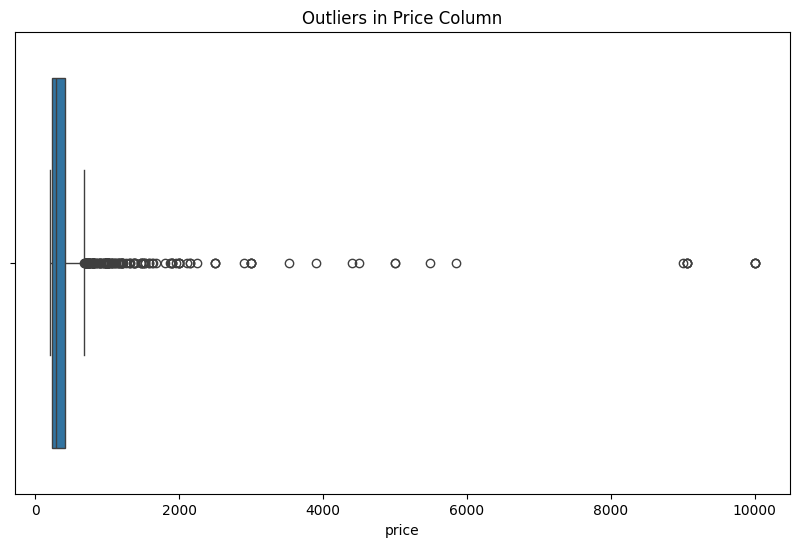

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular IQR
Q1 = df_barcelona['price'].quantile(0.25)
Q3 = df_barcelona['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar solo los outliers
outliers = df_barcelona[(df_barcelona['price'] < lower_bound) | (df_barcelona['price'] > upper_bound)]

# Gráfico de los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=outliers['price'])
plt.title('Outliers in Price Column')
plt.show()


In [ ]:
# Calculate the 25th and 75th percentiles of the price column to define the IQR
Q1 = df_barcelona['price'].quantile(0.25)
Q3 = df_barcelona['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where price is an outlier
outliers = df_barcelona[(df_barcelona['price'] < lower_bound) | (df_barcelona['price'] > upper_bound)]

# Calculate the median price for each neighborhood
neighbourhood_median_price = df_barcelona.groupby('neighbourhood_group_cleansed')['price'].median()

# Function to impute outliers with the median price of the respective neighborhood
def impute_outliers(row):
    if row['price'] < lower_bound or row['price'] > upper_bound:
        return neighbourhood_median_price[row['neighbourhood_group_cleansed']]
    return row['price']

# Apply the function to impute outliers
df_barcelona['price'] = df_barcelona.apply(impute_outliers, axis=1)

# Check if any outliers remain
remaining_outliers = df_barcelona[(df_barcelona['price'] < lower_bound) | (df_barcelona['price'] > upper_bound)]
print(f"Remaining outliers: {remaining_outliers.shape[0]}")

Remaining outliers: 0


In [ ]:
df_barcelona.to_csv('df_barcelona.csv', index=False)

from google.colab import files
files.download('df_barcelona.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Analysis

In [ ]:
# Get a summary of the dataset (data types, non-null counts)
print(df_barcelona.info())

# Get descriptive statistics (mean, median, min, max, etc.)
print(df_barcelona.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19455 entries, 0 to 19454
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19455 non-null  int64  
 1   listing_url                                   19455 non-null  object 
 2   scrape_id                                     19455 non-null  int64  
 3   last_scraped                                  19455 non-null  object 
 4   source                                        19455 non-null  object 
 5   name                                          19455 non-null  object 
 6   description                                   18714 non-null  object 
 7   picture_url                                   19455 non-null  object 
 8   host_id                                       19455 non-null  int64  
 9   host_url                                      19455 non-null 

### Amenities

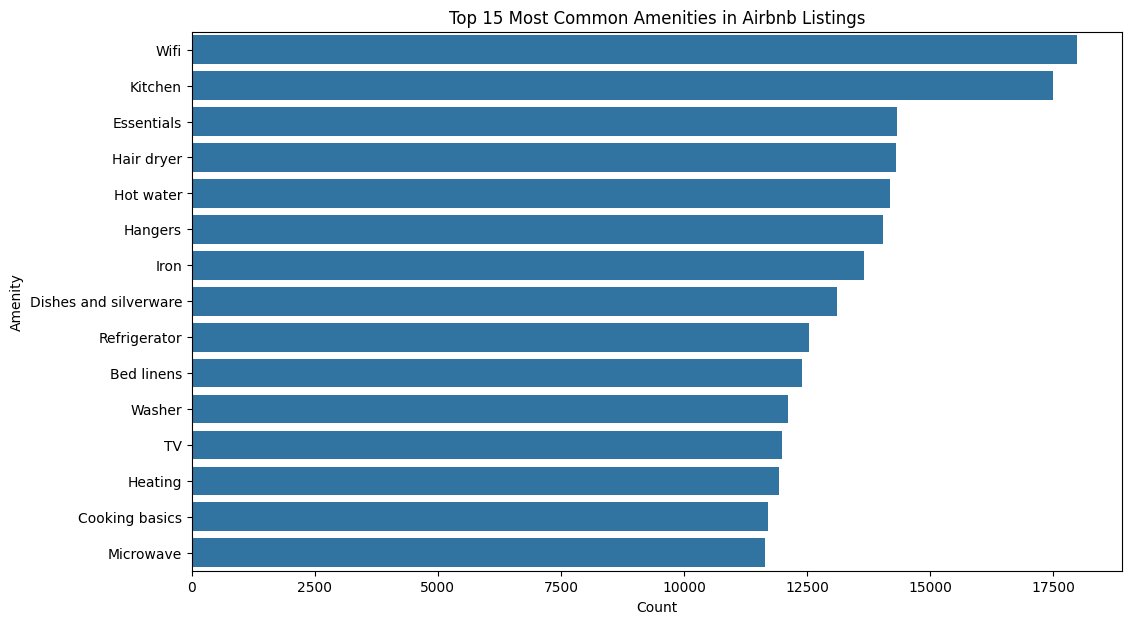

In [ ]:
# 4. Top Amenities
from collections import Counter
import ast

amenities_list = []
for amenities in df_barcelona['amenities']:
    amenities_list.extend(ast.literal_eval(amenities))

amenities_count = Counter(amenities_list)
top_amenities = amenities_count.most_common(15)

amenities_df = pd.DataFrame(top_amenities, columns=['Amenity', 'Count'])
plt.figure(figsize=(12, 7))
sns.barplot(y='Amenity', x='Count', data=amenities_df)
plt.title('Top 15 Most Common Amenities in Airbnb Listings')
plt.show()

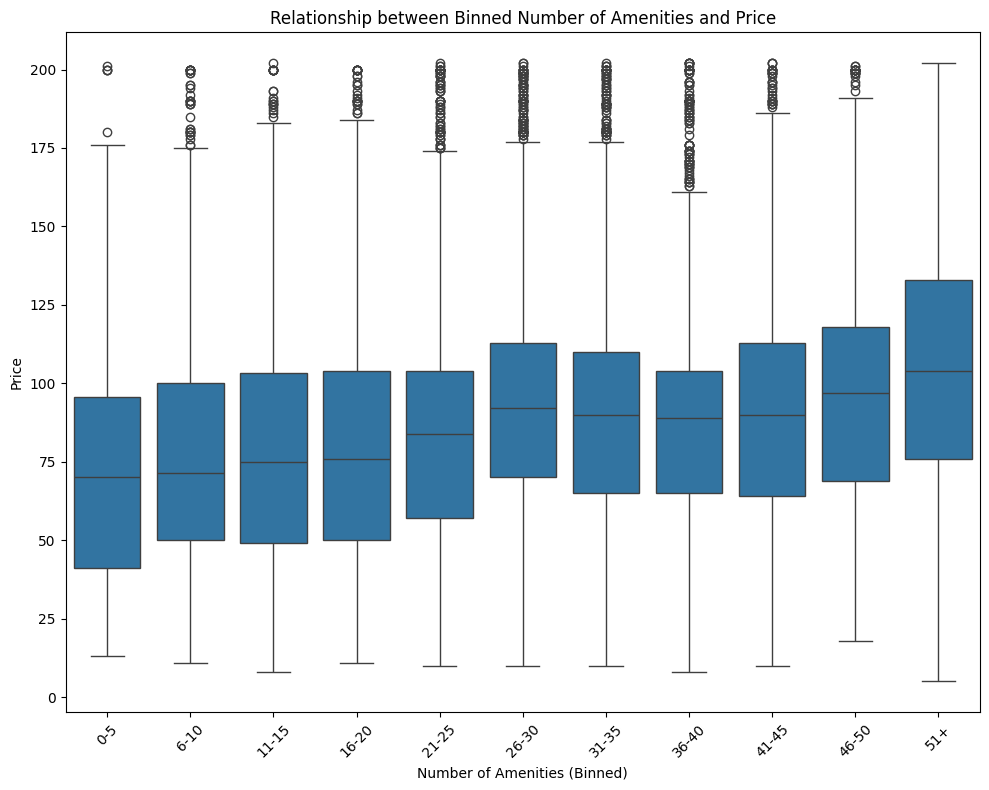

In [ ]:
# Calculate amenities_count
df_barcelona['amenities_count'] = df_barcelona['amenities'].apply(lambda x: len(x.split(',')))

# Define bins for amenities_count
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, df_barcelona['amenities_count'].max()]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']

# Create a new column 'amenities_count_binned' that categorizes the amenities_count
df_barcelona['amenities_count_binned'] = pd.cut(df_barcelona['amenities_count'], bins=bins, labels=labels, right=False)

# Visualizing the relationship between binned 'amenities_count' and 'price'
plt.figure(figsize=(10, 8))
sns.boxplot(x='amenities_count_binned', y='price', data=df_barcelona)
plt.title("Relationship between Binned Number of Amenities and Price")
plt.xlabel('Number of Amenities (Binned)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Price Analysis

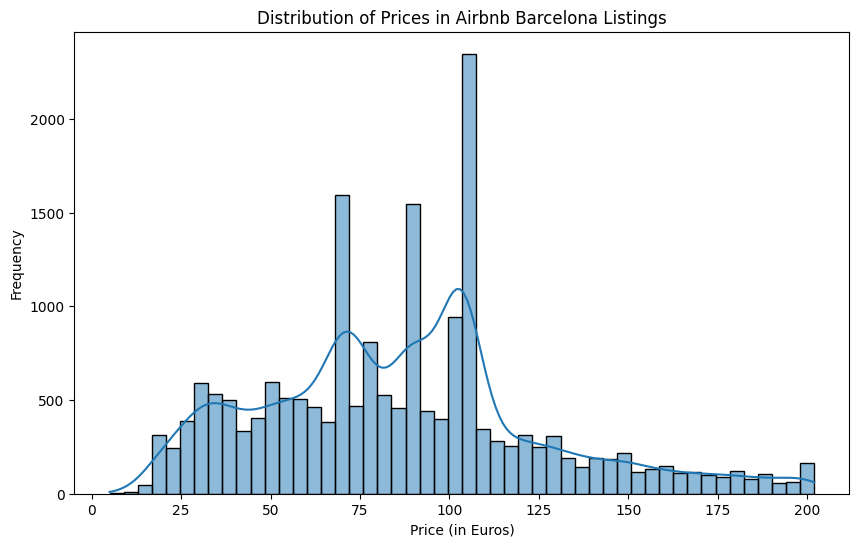

In [ ]:
# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_barcelona['price'], bins=50, kde=True)
plt.title('Distribution of Prices in Airbnb Barcelona Listings')
plt.xlabel('Price (in Euros)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-67-3d34a2607846>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barcelona, x='instant_bookable', y='price', palette='coolwarm')


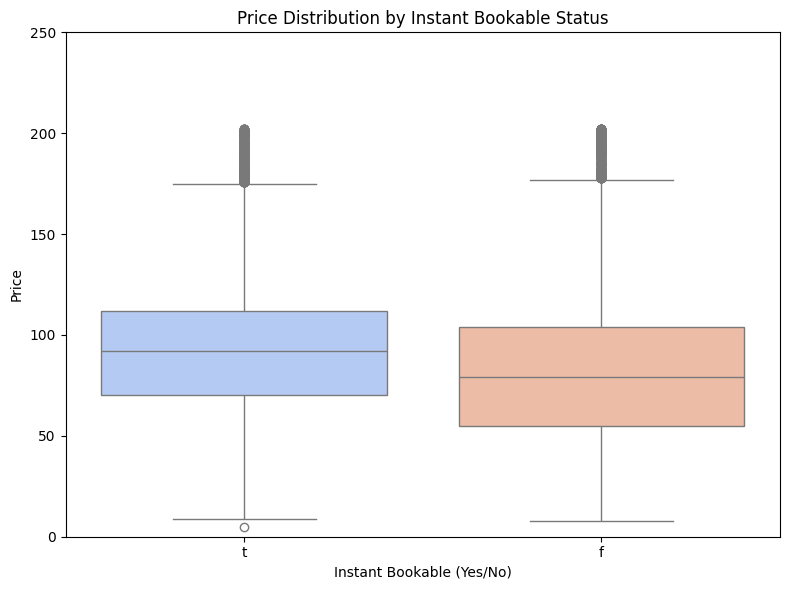

In [ ]:
# Plotting Price vs Instant Bookable status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_barcelona, x='instant_bookable', y='price', palette='coolwarm')

# Adding title and labels
plt.title('Price Distribution by Instant Bookable Status')
plt.xlabel('Instant Bookable (Yes/No)')
plt.ylabel('Price')

# Adjust y-axis limits to match the price data range (based on the descriptive statistics provided)
plt.ylim(0, 250)

# Tight layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


### Global Median Price

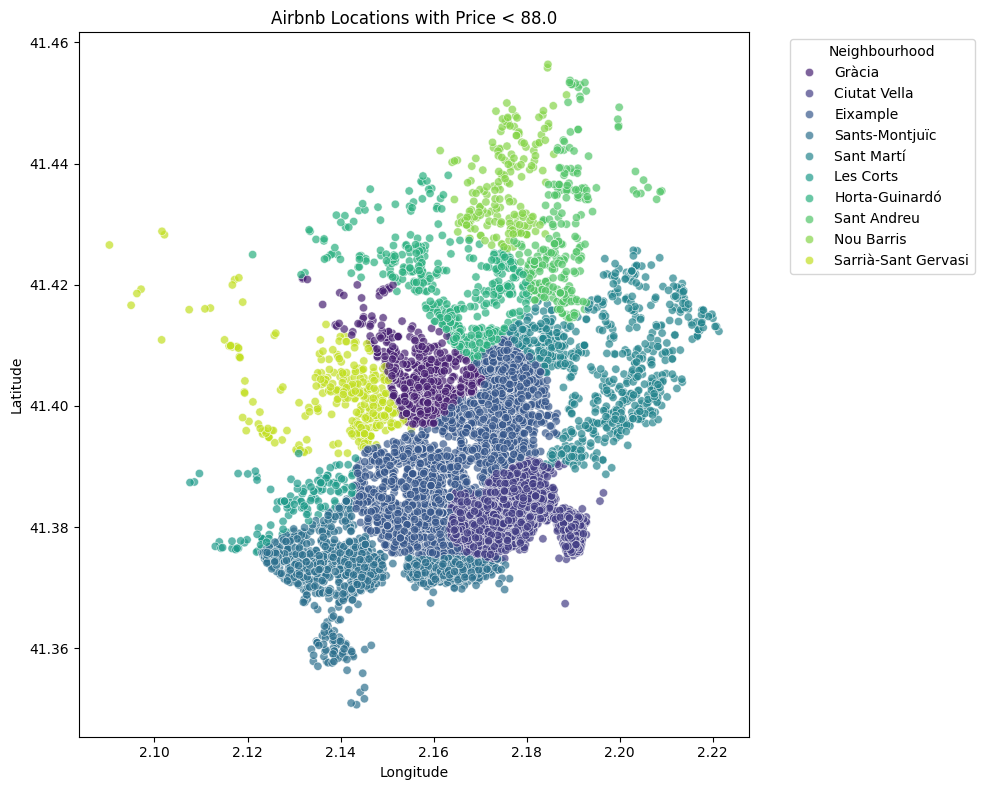

In [ ]:
# Calculate the median price
median_price = df_barcelona['price'].median()

# Filter locations with price less than the median price
low_price = df_barcelona[df_barcelona['price'] < median_price]

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=low_price, x='longitude', y='latitude', hue='neighbourhood_group_cleansed', palette='viridis', alpha=0.7)
plt.title(f'Airbnb Locations with Price < {median_price}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.show()

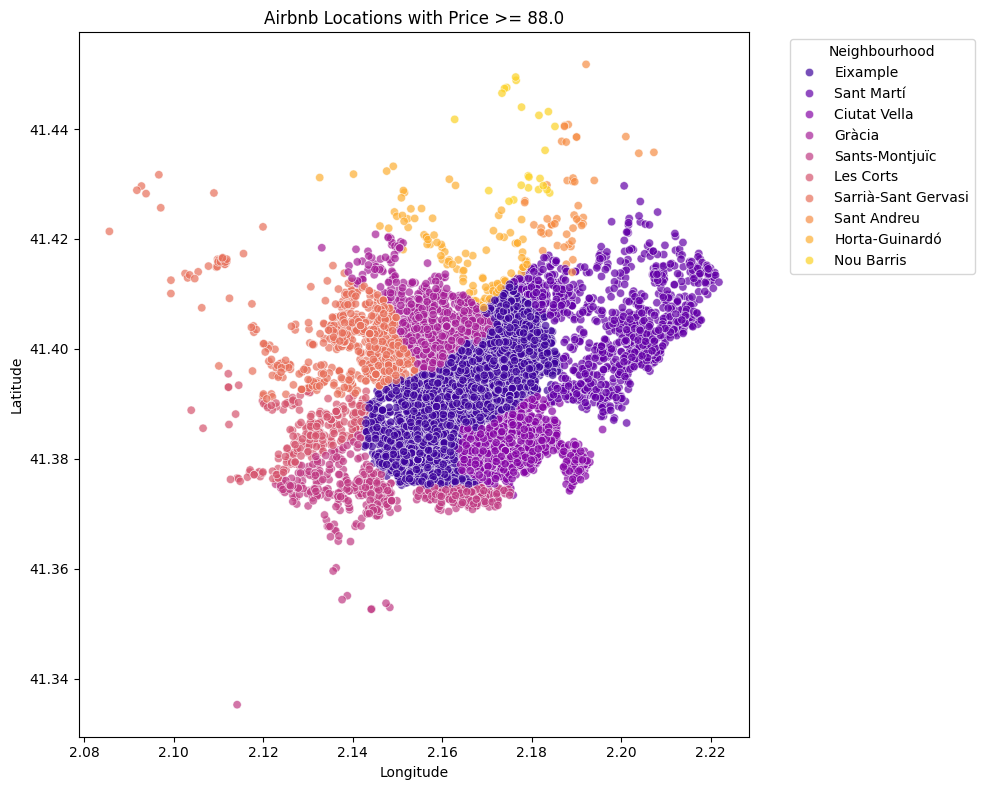

In [ ]:
# Calculate the median price
median_price = df_barcelona['price'].median()

# Filter locations with price greater than or equal to the median price
high_price = df_barcelona[df_barcelona['price'] >= median_price]

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=high_price, x='longitude', y='latitude', hue='neighbourhood_group_cleansed', palette='plasma', alpha=0.7)
plt.title(f'Airbnb Locations with Price >= {median_price}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Median Price per Neighbourhood

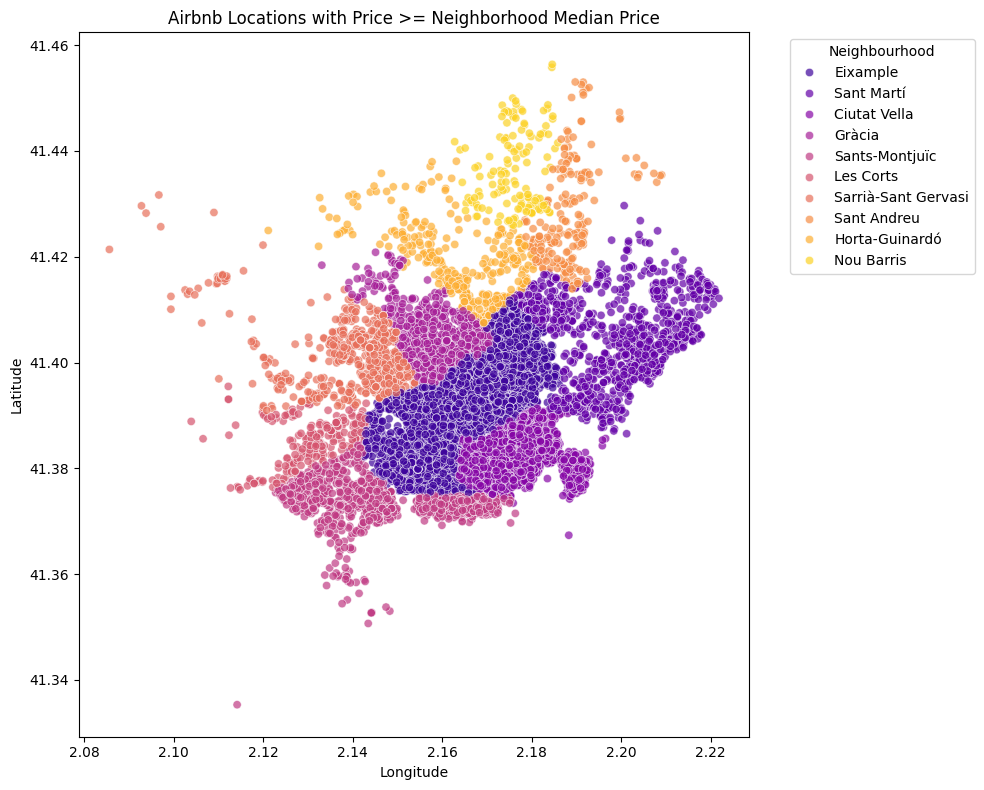

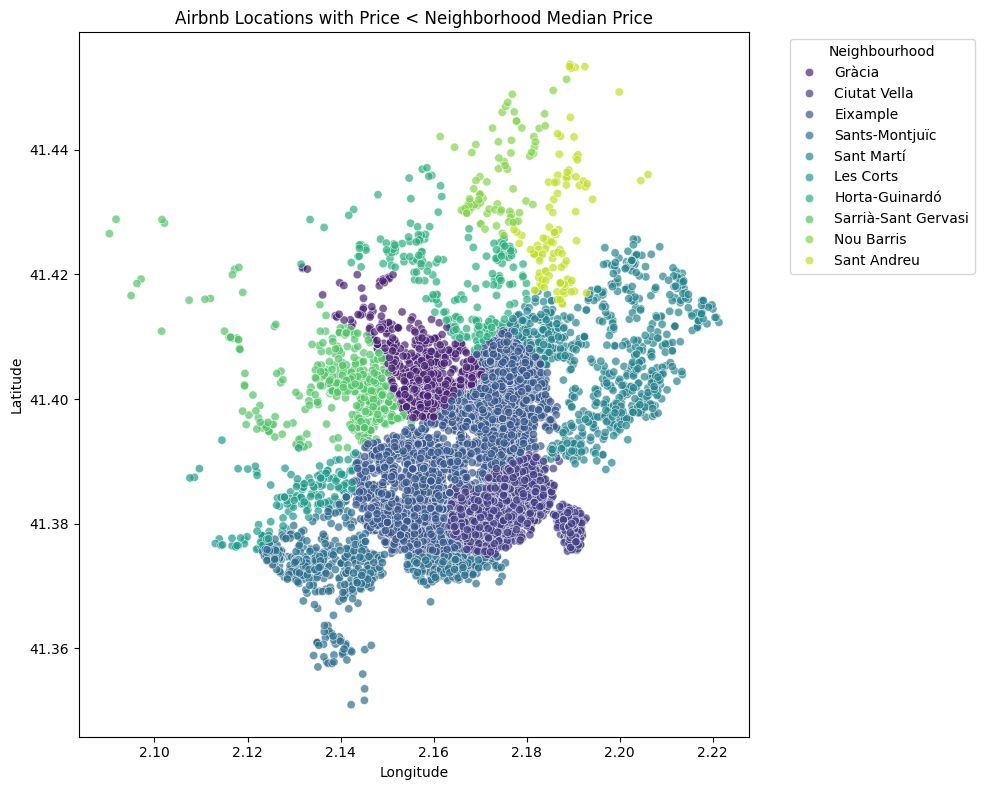

In [ ]:
# Step 1: Calculate the median price for each neighborhood
neighbourhood_median_price = df_barcelona.groupby('neighbourhood_group_cleansed')['price'].median()

# Step 2: Merge the median price back to the original dataframe
df_barcelona = df_barcelona.merge(neighbourhood_median_price, on='neighbourhood_group_cleansed', suffixes=('', '_neighbourhood_median'))

# Step 3: Create two new columns to classify properties based on price vs. the neighborhood median price
df_barcelona['price_greater_than_median'] = (df_barcelona['price'] >= df_barcelona['price_neighbourhood_median']).astype(int)

# Step 4: Split the data into two groups:
# - One where the price is greater than or equal to the neighborhood median price
# - One where the price is less than the neighborhood median price
high_price_neighbourhood = df_barcelona[df_barcelona['price_greater_than_median'] == 1]
low_price_neighbourhood = df_barcelona[df_barcelona['price_greater_than_median'] == 0]

# Step 5: Plot the locations where the price is greater than or equal to the neighborhood median price
plt.figure(figsize=(10, 8))
sns.scatterplot(data=high_price_neighbourhood, x='longitude', y='latitude', hue='neighbourhood_group_cleansed', palette='plasma', alpha=0.7)
plt.title('Airbnb Locations with Price >= Neighborhood Median Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 6: Plot the locations where the price is less than the neighborhood median price
plt.figure(figsize=(10, 8))
sns.scatterplot(data=low_price_neighbourhood, x='longitude', y='latitude', hue='neighbourhood_group_cleansed', palette='viridis', alpha=0.7)
plt.title('Airbnb Locations with Price < Neighborhood Median Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-71-837bd7992c86>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barcelona, x='bathrooms_binned', y='price', palette='coolwarm')
<ipython-input-71-837bd7992c86>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barcelona, x='beds_binned', y='price', palette='viridis')
<ipython-input-71-837bd7992c86>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barcelona, x='bedrooms_binned', y='price', palette='plasma')


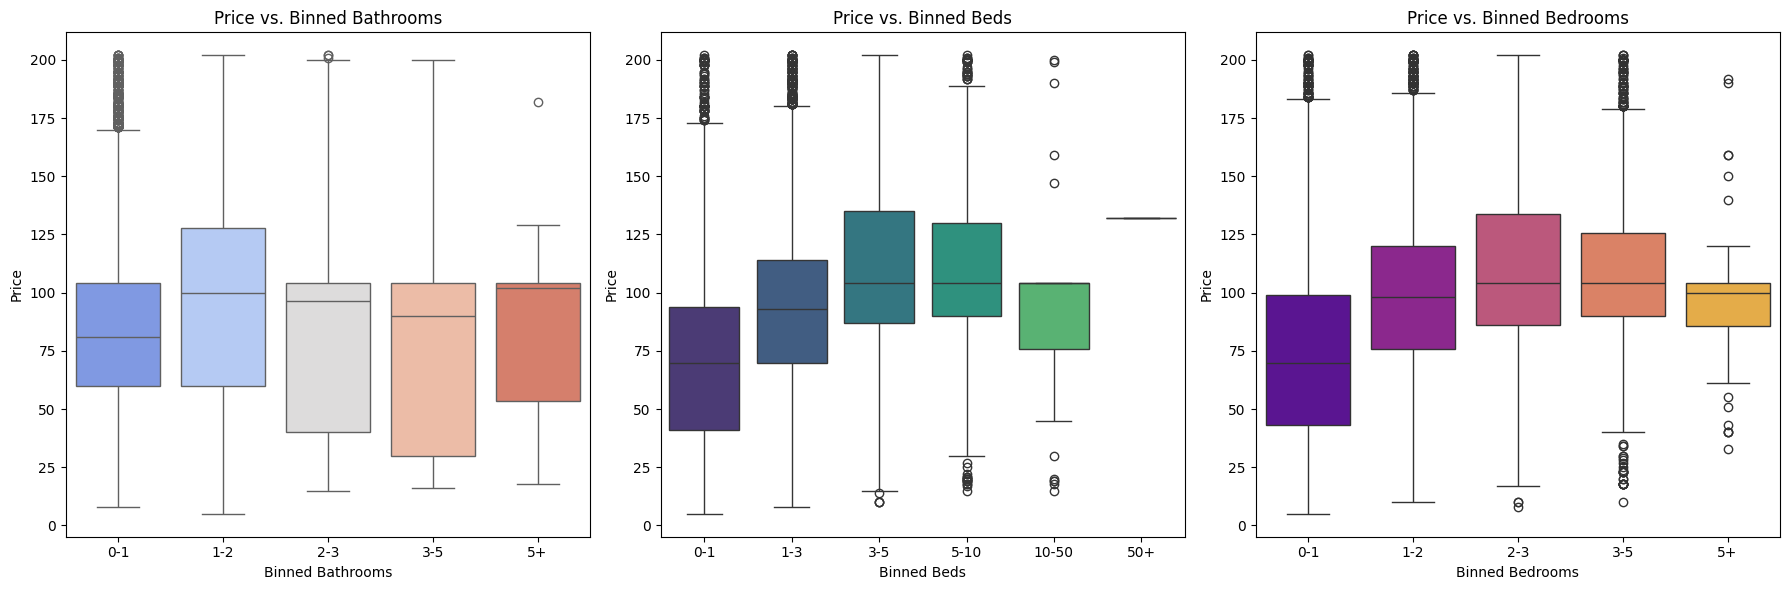

In [ ]:
# Binning according to the provided statistics for 'bathrooms', 'beds', and 'bedrooms'
df_barcelona['bathrooms_binned'] = pd.cut(df_barcelona['bathrooms'], bins=[-1, 1, 2, 3, 5, 50], labels=['0-1', '1-2', '2-3', '3-5', '5+'])
df_barcelona['beds_binned'] = pd.cut(df_barcelona['beds'], bins=[-1, 1, 3, 5, 10, 50, 127], labels=['0-1', '1-3', '3-5', '5-10', '10-50', '50+'])
df_barcelona['bedrooms_binned'] = pd.cut(df_barcelona['bedrooms'], bins=[-1, 1, 2, 3, 5, 50], labels=['0-1', '1-2', '2-3', '3-5', '5+'])

# Set up the plotting area for binned data
plt.figure(figsize=(18, 6))

# Boxplot for Price vs Binned Bathrooms
plt.subplot(1, 3, 1)
sns.boxplot(data=df_barcelona, x='bathrooms_binned', y='price', palette='coolwarm')
plt.xlabel('Binned Bathrooms')
plt.ylabel('Price')
plt.title('Price vs. Binned Bathrooms')

# Boxplot for Price vs Binned Beds
plt.subplot(1, 3, 2)
sns.boxplot(data=df_barcelona, x='beds_binned', y='price', palette='viridis')
plt.xlabel('Binned Beds')
plt.ylabel('Price')
plt.title('Price vs. Binned Beds')

# Boxplot for Price vs Binned Bedrooms
plt.subplot(1, 3, 3)
sns.boxplot(data=df_barcelona, x='bedrooms_binned', y='price', palette='plasma')
plt.xlabel('Binned Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Binned Bedrooms')

plt.tight_layout()
plt.show()


<ipython-input-73-a718640f529c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barcelona, x='accommodates', y='price', palette='magma')


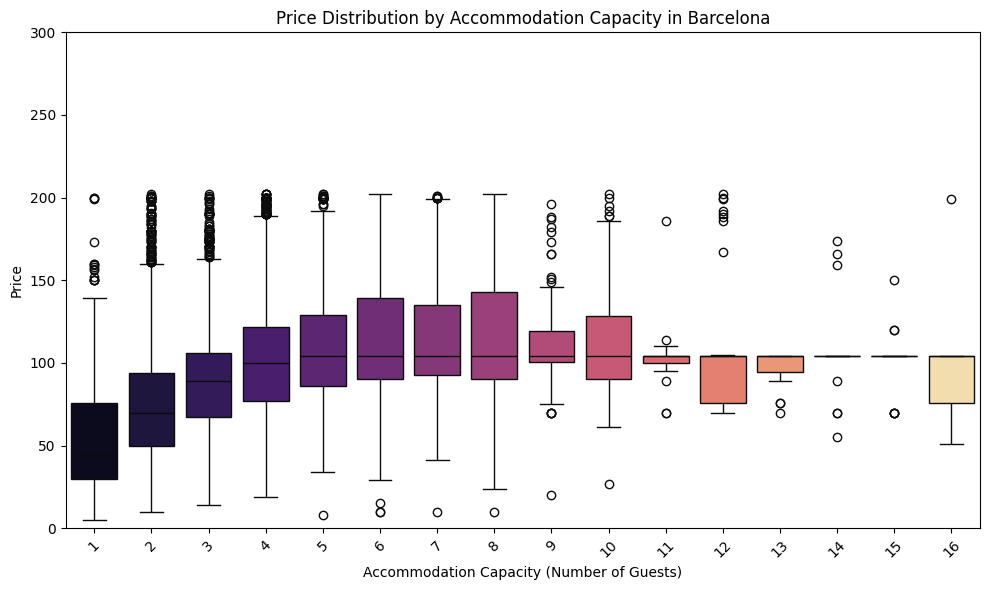

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'accommodates' vs 'price' using raw values
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_barcelona, x='accommodates', y='price', palette='magma')

# Labels and title
plt.xlabel('Accommodation Capacity (Number of Guests)')
plt.ylabel('Price')
plt.title('Price Distribution by Accommodation Capacity in Barcelona')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Limit the y-axis up to 300
plt.ylim(0, 300)

# Display the adjusted plot
plt.tight_layout()
plt.show()


###Number of reviews and price

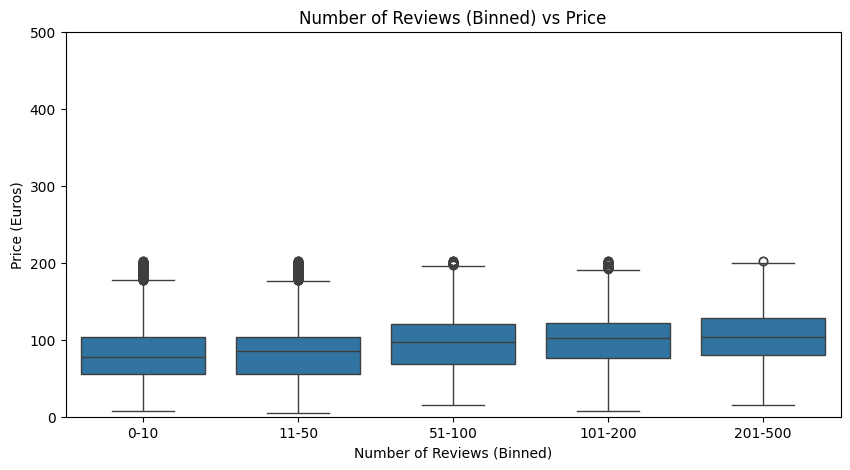

In [ ]:
# Relationship between number of reviews and price (Binned for clarity)
bins = [0, 10, 50, 100, 200, 500]
labels = ["0-10", "11-50", "51-100", "101-200", "201-500"]
df_barcelona['review_bins'] = pd.cut(df_barcelona['number_of_reviews'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,5))
sns.boxplot(x=df_barcelona['review_bins'], y=df_barcelona['price'])
plt.title("Number of Reviews (Binned) vs Price")
plt.xlabel("Number of Reviews (Binned)")
plt.ylabel("Price (Euros)")
plt.ylim(0, 500)
plt.show()


In [ ]:
# Define a threshold for 'cheap' and 'expensive'
price_threshold = df_barcelona['price'].median()

# Cheap properties
cheap_properties = df_barcelona[df_barcelona['price'] <= price_threshold]

# Expensive properties
expensive_properties = df_barcelona[df_barcelona['price'] > price_threshold]

# Compare amenities and ratings between cheap and expensive properties
print("Comparison between cheap and expensive properties:")
print("Cheap properties - Average amenities_count:", cheap_properties['amenities_count'].mean())
print("Expensive properties - Average amenities_count:", expensive_properties['amenities_count'].mean())

print("\nNeighborhood rating in cheap vs. expensive properties:")
print("Cheap properties - Average review_scores_location:", cheap_properties['review_scores_location'].mean())
print("Expensive properties - Average review_scores_location:", expensive_properties['review_scores_location'].mean())


Comparison between cheap and expensive properties:
Cheap properties - Average amenities_count: 24.24519427402863
Expensive properties - Average amenities_count: 28.63359173126615

Neighborhood rating in cheap vs. expensive properties:
Cheap properties - Average review_scores_location: 4.750794478527608
Expensive properties - Average review_scores_location: 4.795663049095607


### Location Influence

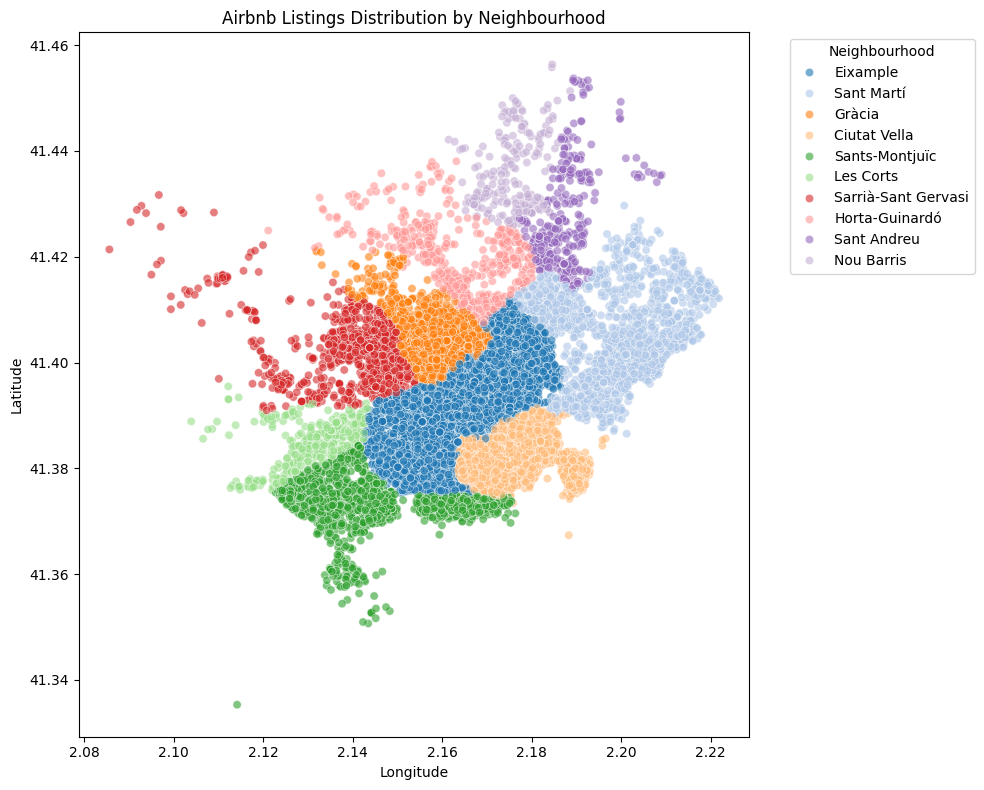

In [ ]:
# Airbnb Distribution by Longitude and Latitude
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_barcelona, x='longitude', y='latitude', hue='neighbourhood_group_cleansed', palette='tab20', alpha=0.6)
plt.title('Airbnb Listings Distribution by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

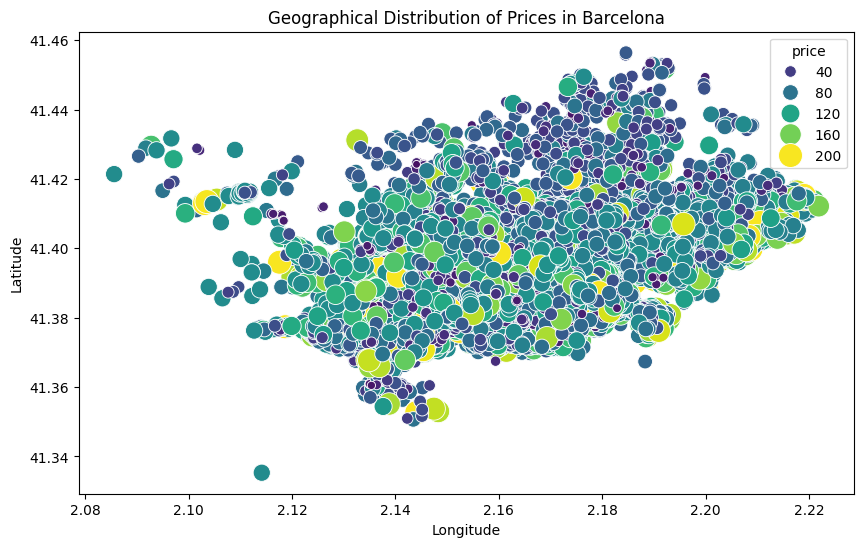

In [ ]:
# 3. Location Impact on Pricing
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_barcelona, x='longitude', y='latitude', hue='price', palette='viridis', size='price', sizes=(20, 300))
plt.title('Geographical Distribution of Prices in Barcelona')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<ipython-input-78-3889da57c0d8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_by_neighbourhood, x='price', y='neighbourhood_group_cleansed', palette='viridis')


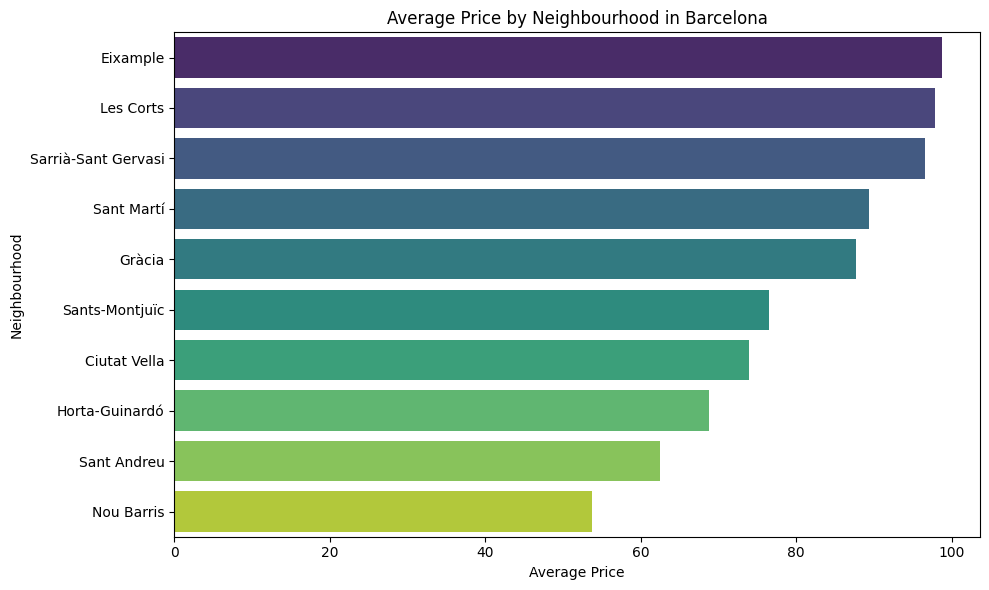

In [ ]:
# Calculate average price by neighborhood
price_by_neighbourhood = df_barcelona.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()

# Sort neighborhoods by average price in descending order
price_by_neighbourhood = price_by_neighbourhood.sort_values(by='price', ascending=False)

# Visualization using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=price_by_neighbourhood, x='price', y='neighbourhood_group_cleansed', palette='viridis')

plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('Average Price by Neighbourhood in Barcelona')
plt.tight_layout()

plt.show()

<ipython-input-79-5af5e3e760fc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighborhood_counts, x='Listings', y='Neighborhood', palette='viridis')


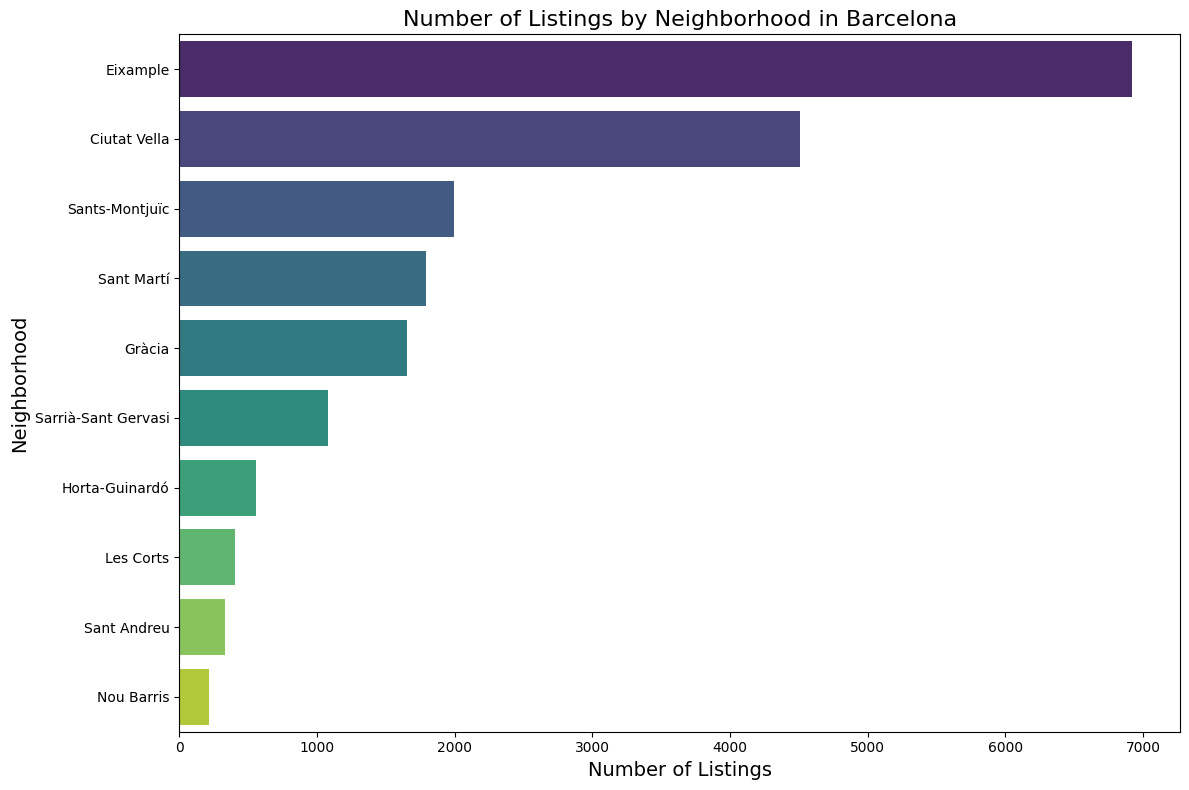

In [ ]:
# Count the number of listings per neighborhood
neighborhood_counts = df_barcelona['neighbourhood_group_cleansed'].value_counts().reset_index()
neighborhood_counts.columns = ['Neighborhood', 'Listings']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=neighborhood_counts, x='Listings', y='Neighborhood', palette='viridis')

# Add titles and labels
plt.title('Number of Listings by Neighborhood in Barcelona', fontsize=16)
plt.xlabel('Number of Listings', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)

# Improve layout
plt.tight_layout()
plt.show()

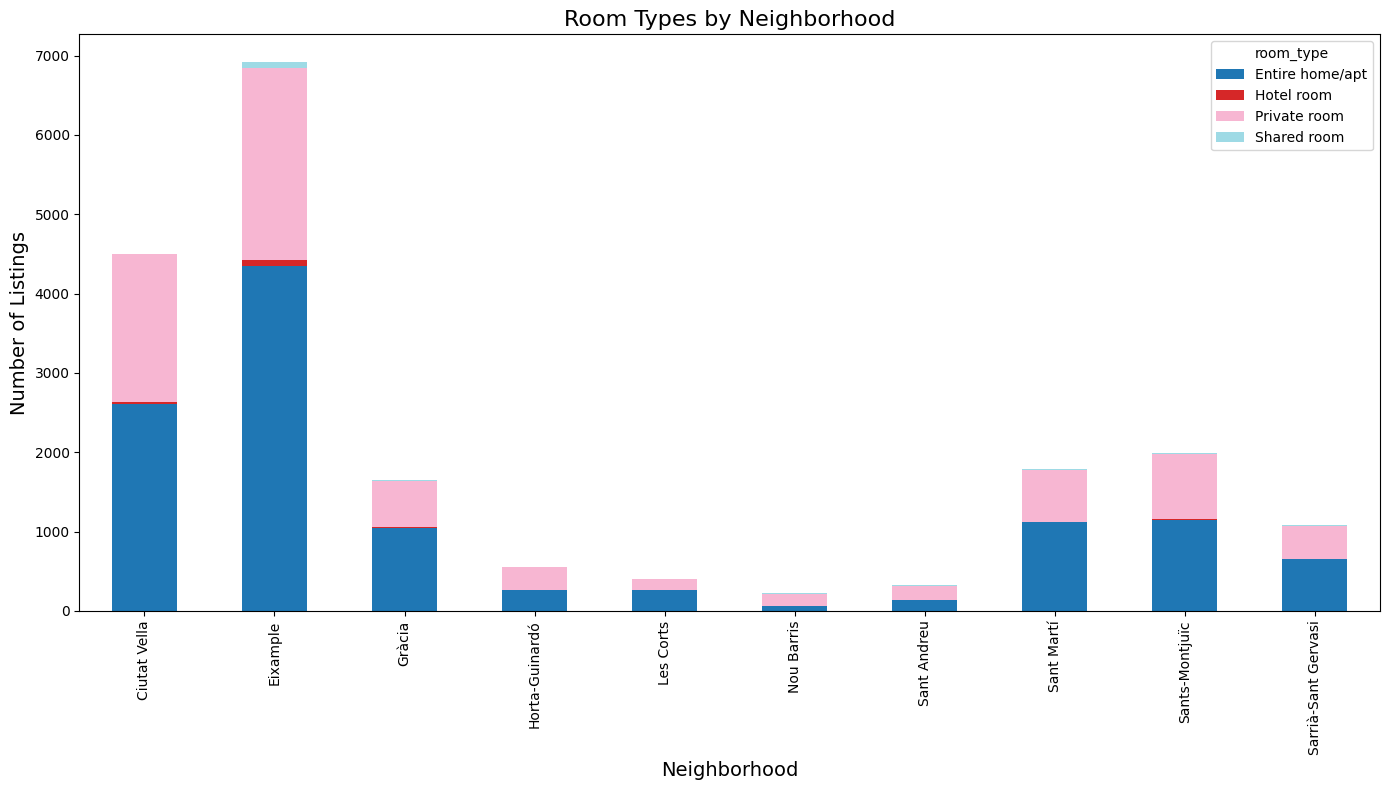

In [ ]:
import matplotlib.pyplot as plt

# Create a cross-tabulation of neighborhood and room type
property_neighborhood = pd.crosstab(df_barcelona['neighbourhood_group_cleansed'], df_barcelona['room_type'])

# Plot a stacked bar chart with a more vibrant color palette
plt.figure(figsize=(14, 8))
property_neighborhood.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Add titles and labels
plt.title('Room Types by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

# Improve layout and rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-81-a360e81c2523>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barcelona, x='review_scores_location_binned', y='price', palette='coolwarm')


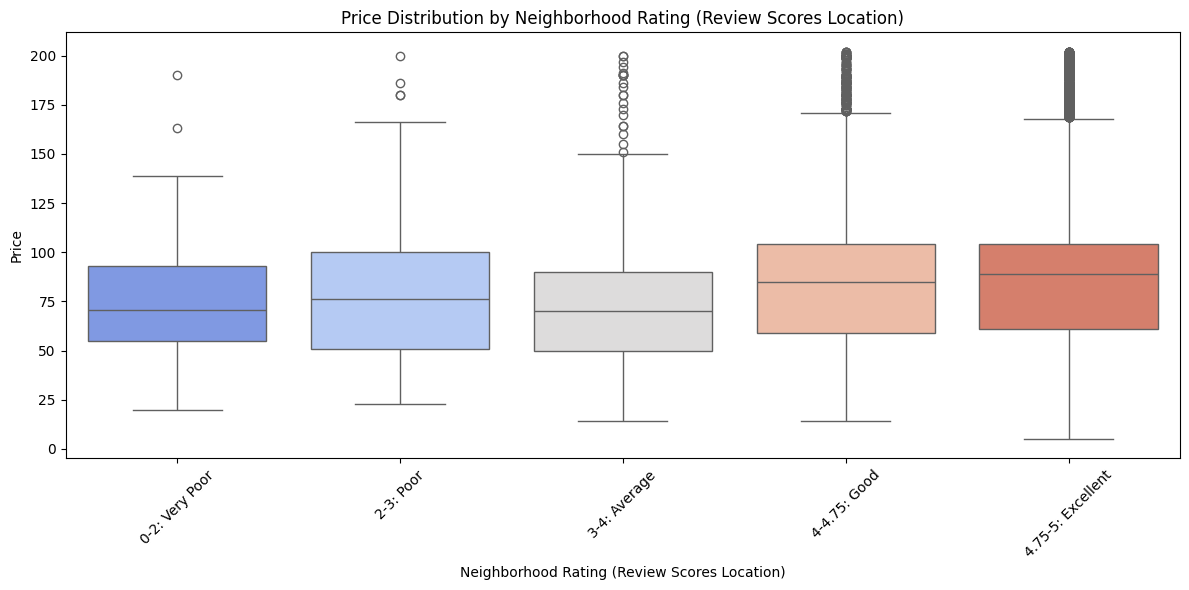

In [ ]:
# Define the bins and labels for categorization based on review_scores_location
bins = [0, 2.0, 3.0, 4.0, 4.75, 5.0]  # Defined bins for different rating ranges
labels = [0, 1, 2, 3, 4]  # Categories: 0, 1, 2, 3, and 4 for review scores location

# Apply binning to the 'review_scores_location' column
df_barcelona['review_scores_location_binned'] = pd.cut(df_barcelona['review_scores_location'], bins=bins, labels=labels, include_lowest=True)

# Define what each category represents
category_descriptions = {
    0: '0-2: Very Poor',
    1: '2-3: Poor',
    2: '3-4: Average',
    3: '4-4.75: Good',
    4: '4.75-5: Excellent'
}

# Create the labels without the count for each bin
bin_labels = [category_descriptions[label] for label in labels]

# Visualizing the relationship between 'review_scores_location_binned' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_barcelona, x='review_scores_location_binned', y='price', palette='coolwarm')

# Title and labels
plt.title('Price Distribution by Neighborhood Rating (Review Scores Location)')
plt.xlabel('Neighborhood Rating (Review Scores Location)')
plt.ylabel('Price')

# Update the x-axis labels to include only the description
plt.xticks(ticks=range(len(labels)), labels=bin_labels, rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Room Type


Room Type Distribution (Percentage):
room_type
Entire home/apt    59.897199
Private room       38.601902
Shared room         0.909792
Hotel room          0.591108
Name: proportion, dtype: float64


<ipython-input-82-88257073c79e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df_barcelona, palette='Set2')


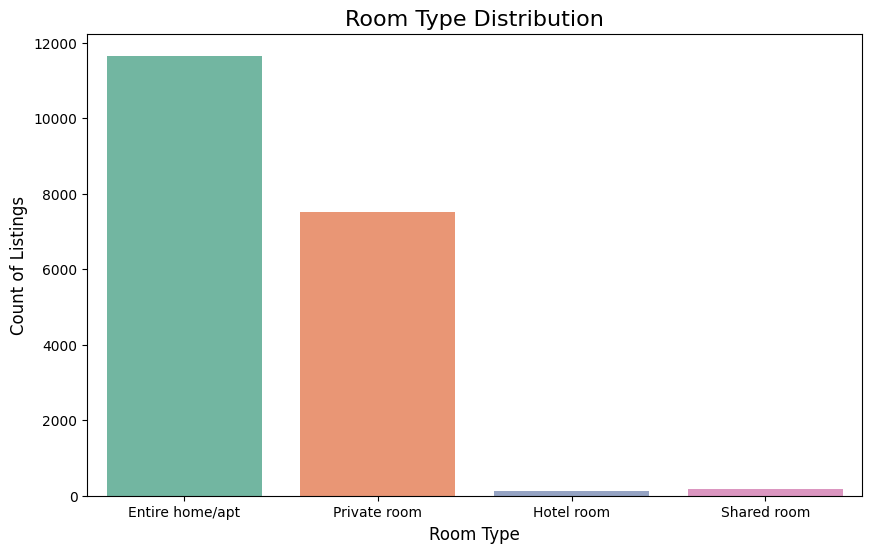

In [ ]:
# Room Type Distribution (Percentage of each room type)
room_type_counts = df_barcelona['room_type'].value_counts(normalize=True) * 100
print("\nRoom Type Distribution (Percentage):")
print(room_type_counts)

# Visualizing Room Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df_barcelona, palette='Set2')
plt.title('Room Type Distribution', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Count of Listings', fontsize=12)
plt.show()

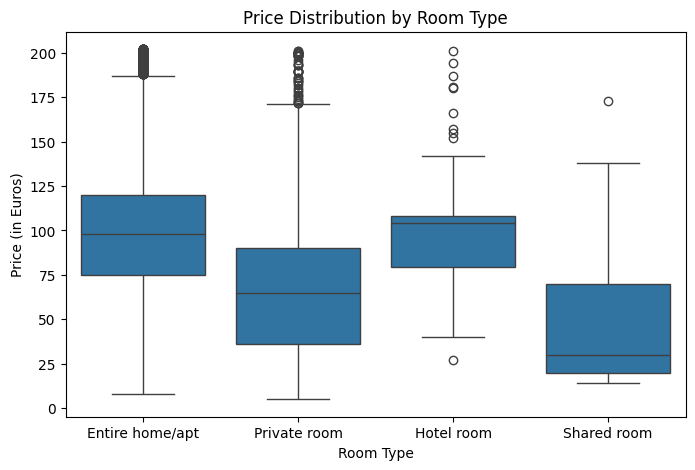

In [ ]:
# 5. Room Type vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='price', data=df_barcelona)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (in Euros)')
plt.show()

### Host Information

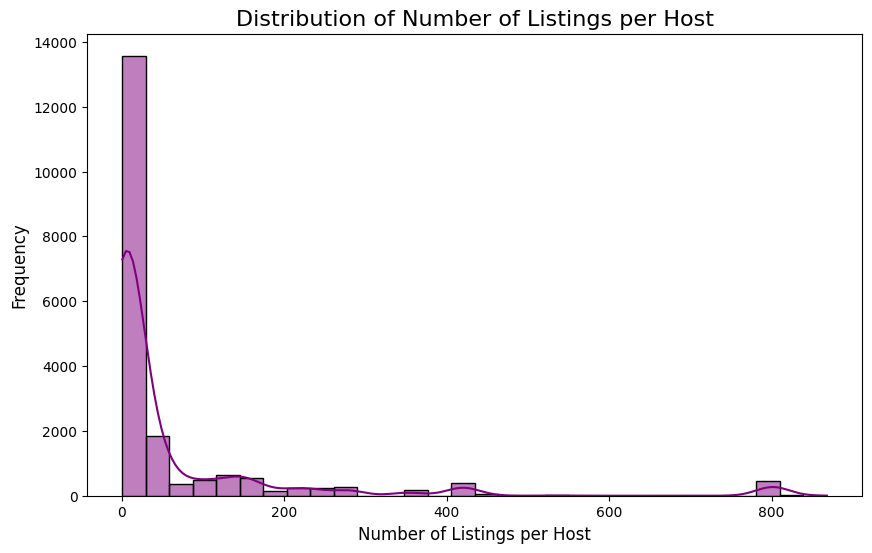

In [ ]:
# Visualizing the number of listings per host (host_listings_count)
plt.figure(figsize=(10, 6))
sns.histplot(df_barcelona['host_listings_count'], kde=True, color='purple', bins=30)
plt.title('Distribution of Number of Listings per Host', fontsize=16)
plt.xlabel('Number of Listings per Host', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

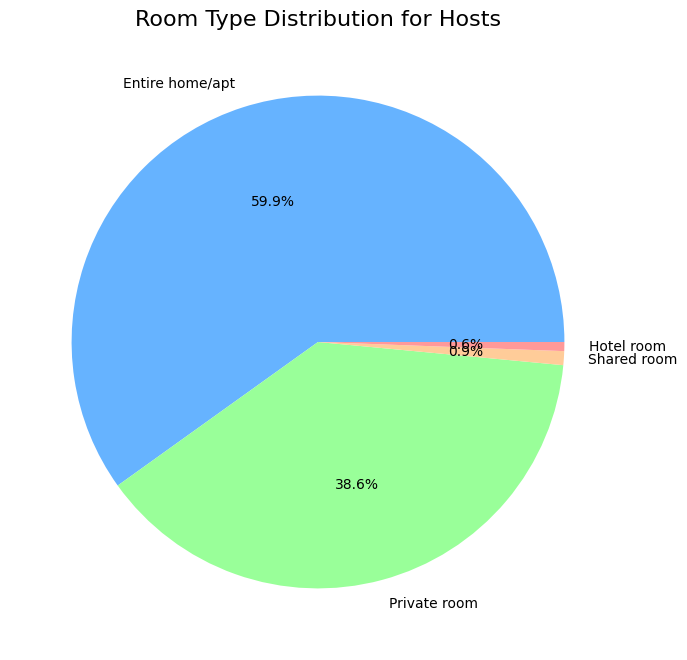

In [ ]:
# Plot a pie chart to show the distribution of room types (for host listings)
room_type_counts = df_barcelona['room_type'].value_counts()
plt.figure(figsize=(8, 8))
room_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
plt.title('Room Type Distribution for Hosts', fontsize=16)
plt.ylabel('')
plt.show()

<ipython-input-86-f24cd4c67e09>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_price_by_superhost, x='host_is_superhost', y='price', palette='coolwarm')


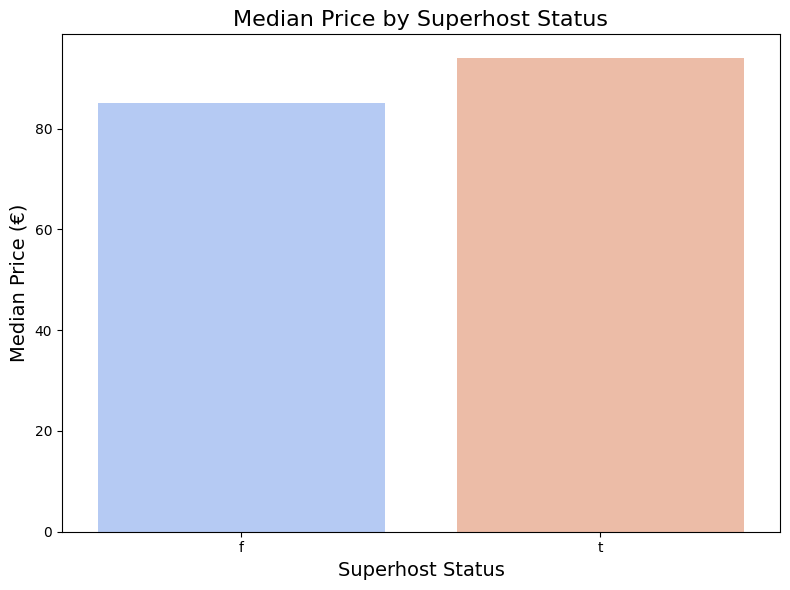

In [ ]:
# Calculate the median price by superhost status
median_price_by_superhost = df_barcelona.groupby('host_is_superhost')['price'].median().reset_index()

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=median_price_by_superhost, x='host_is_superhost', y='price', palette='coolwarm')

# Add labels and title
plt.xlabel('Superhost Status', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.title('Median Price by Superhost Status', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-87-df4166f48966>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barcelona, x='host_listings_count_binned', y='price', palette='coolwarm')


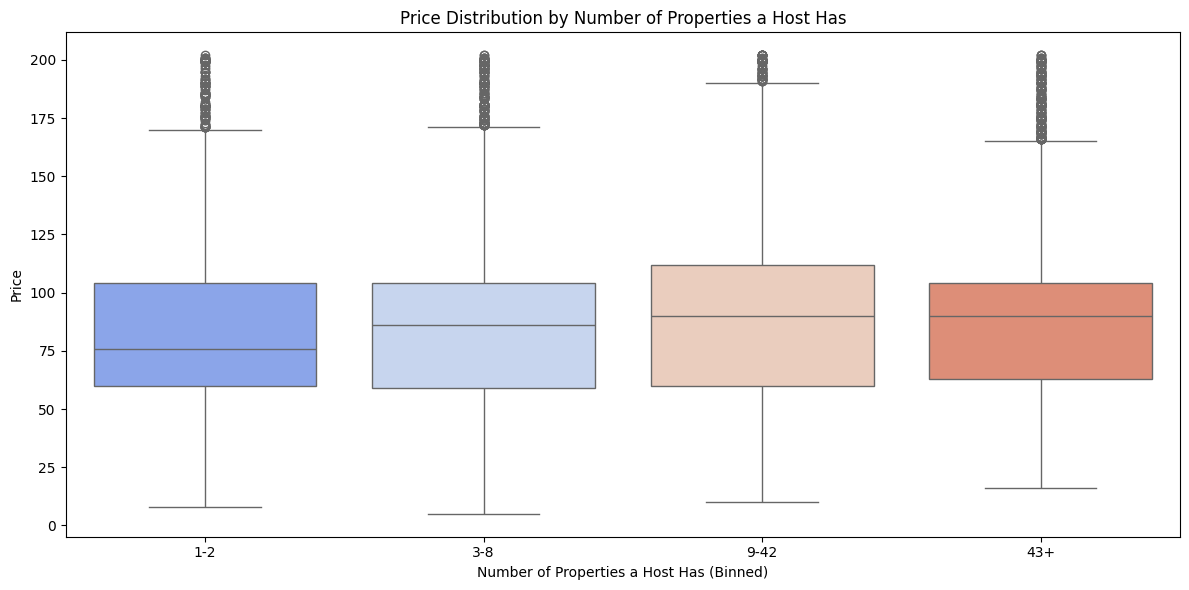

                     host_listings_count     price
host_listings_count             1.000000  0.088484
price                           0.088484  1.000000


In [ ]:
# Define the bins based on the percentiles (25%, 50%, 75%, 100%)
bins = [0, 2, 8, 42, 868]  # Use the values from min, 25%, 50%, 75%, and max
labels = ['1-2', '3-8', '9-42', '43+']  # Corresponding categories

# Apply binning to 'host_listings_count'
df_barcelona['host_listings_count_binned'] = pd.cut(df_barcelona['host_listings_count'], bins=bins, labels=labels, include_lowest=True)

# Visualizing the relationship between binned 'host_listings_count' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_barcelona, x='host_listings_count_binned', y='price', palette='coolwarm')

# Title and labels
plt.title("Price Distribution by Number of Properties a Host Has")
plt.xlabel("Number of Properties a Host Has (Binned)")
plt.ylabel("Price")

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the correlation between 'host_listings_count_binned' and 'price'
host_properties_price_correlation = df_barcelona[['host_listings_count', 'price']].corr()
print(host_properties_price_correlation)



### Review Information

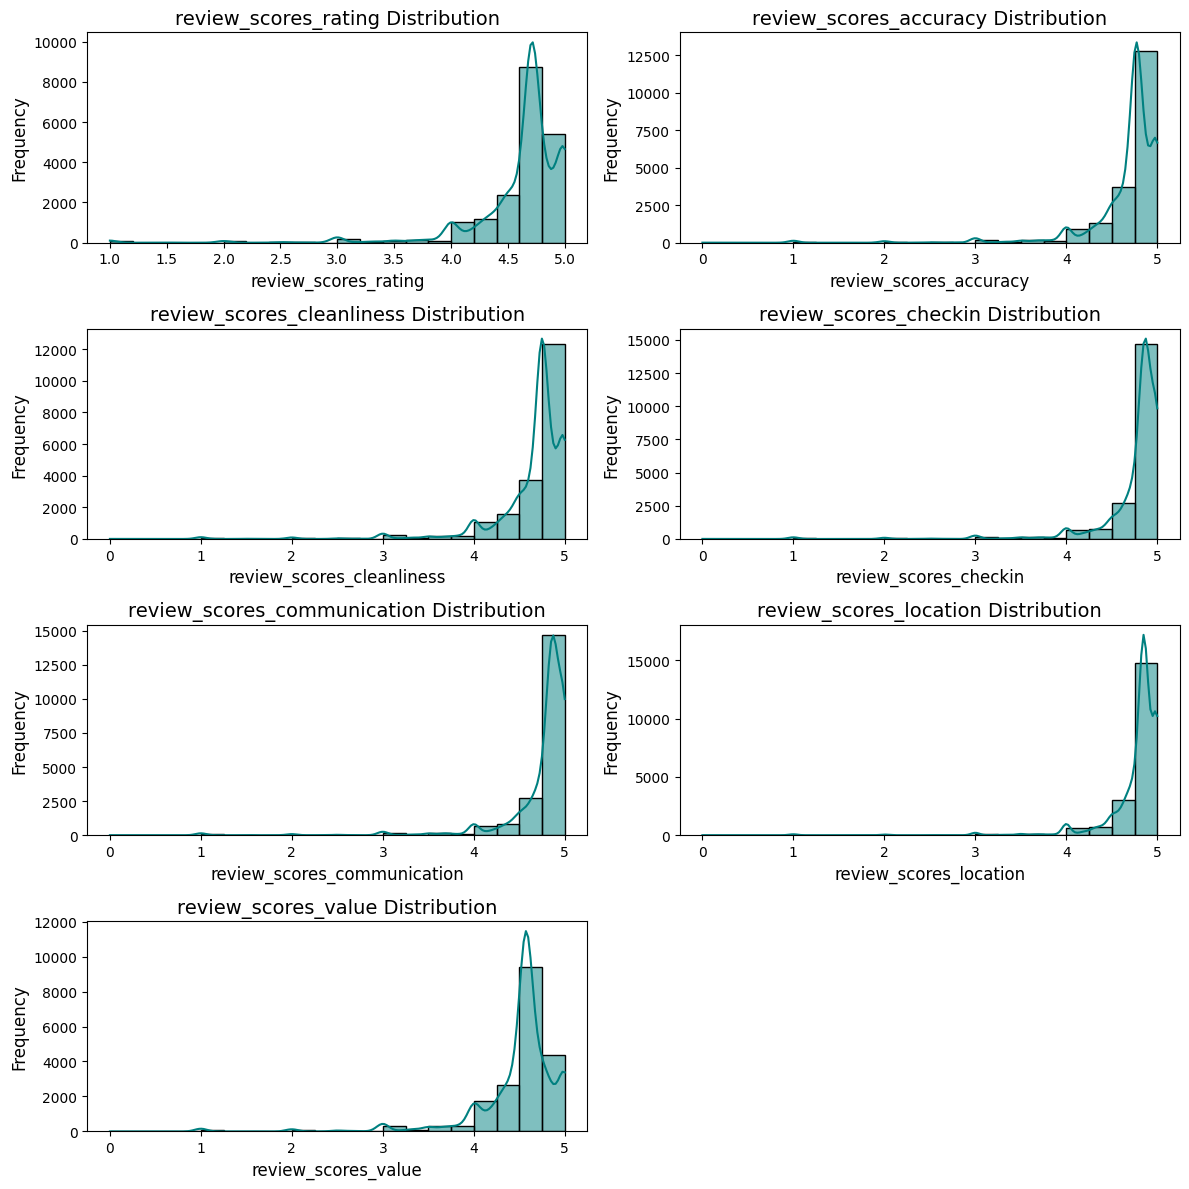

In [ ]:
# Distribution of review scores
review_scores = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

# Creating a subplot for review scores distribution (Updated grid size)
plt.figure(figsize=(12, 12))

# Adjusting the grid layout for 7 review score columns
for i, col in enumerate(review_scores, 1):
    plt.subplot(4, 2, i)  # Using 4 rows and 2 columns
    sns.histplot(df_barcelona[col], kde=True, bins=20, color='teal')
    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-89-bf32c972ecc7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='review_scores_rating', data=df_barcelona, palette='muted')


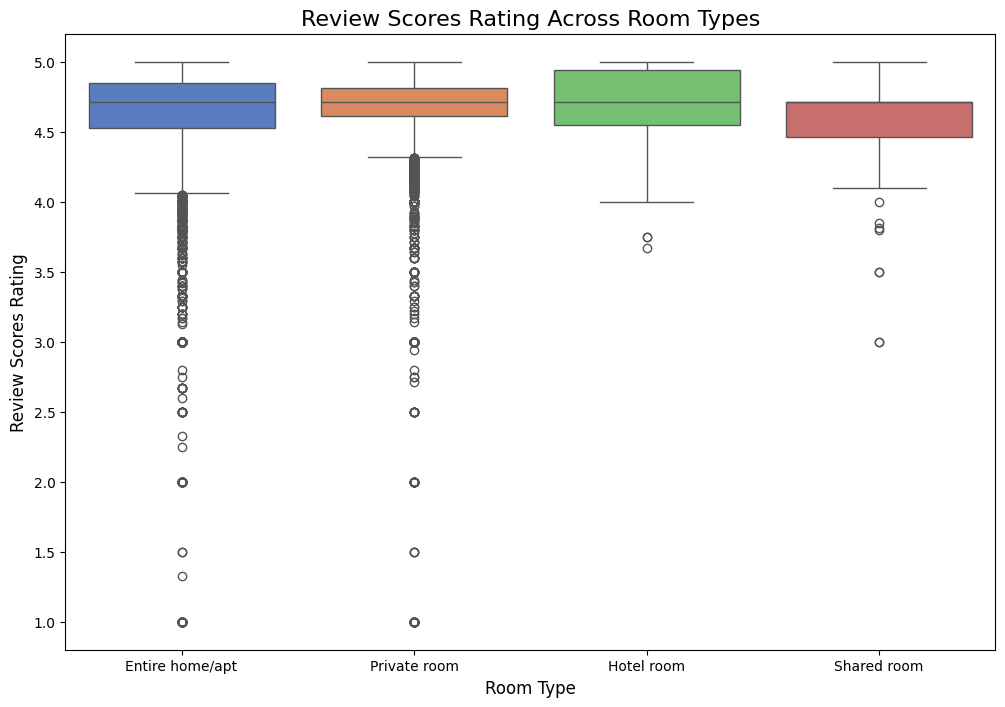

In [ ]:
# Boxplot for review scores across different room types
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='review_scores_rating', data=df_barcelona, palette='muted')
plt.title('Review Scores Rating Across Room Types', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Review Scores Rating', fontsize=12)
plt.show()

<ipython-input-90-bb67b27495f1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barcelona, x='review_scores_rating_binned', y='price', palette='viridis')


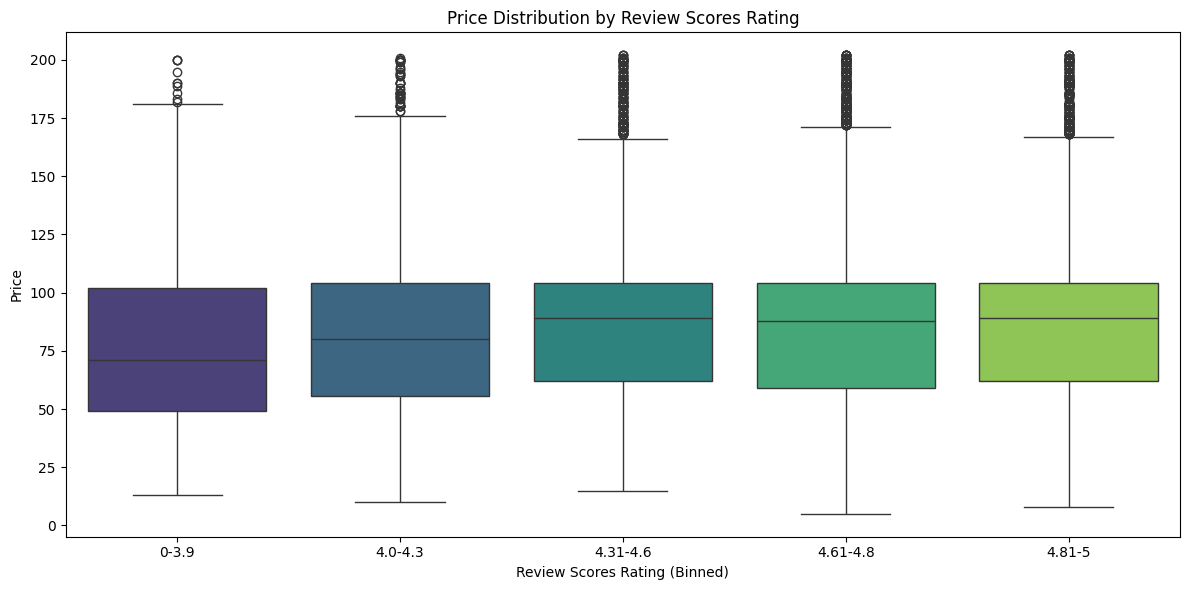

                      review_scores_rating     price
review_scores_rating              1.000000  0.051329
price                             0.051329  1.000000


In [ ]:
# Define the bins based on the updated ranges
bins = [0, 3.9, 4.3, 4.6, 4.8, 5.0]  # Merging the last two categories
labels = ['0-3.9', '4.0-4.3', '4.31-4.6', '4.61-4.8', '4.81-5']  # Merged last two categories

# Apply binning to 'review_scores_rating'
df_barcelona['review_scores_rating_binned'] = pd.cut(df_barcelona['review_scores_rating'], bins=bins, labels=labels, include_lowest=True)

# Visualizing the relationship between binned 'review_scores_rating' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_barcelona, x='review_scores_rating_binned', y='price', palette='viridis')

# Title and labels
plt.title("Price Distribution by Review Scores Rating")
plt.xlabel("Review Scores Rating (Binned)")
plt.ylabel("Price")

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the correlation between 'review_scores_rating_binned' and 'price'
review_scores_price_correlation = df_barcelona[['review_scores_rating', 'price']].corr()
print(review_scores_price_correlation)


### Availability


First 5 rows with availability percentage:
   availability_365  availability_percentage
0                10                 2.739726
1               236                64.657534
2               234                64.109589
3               365               100.000000
4               254                69.589041


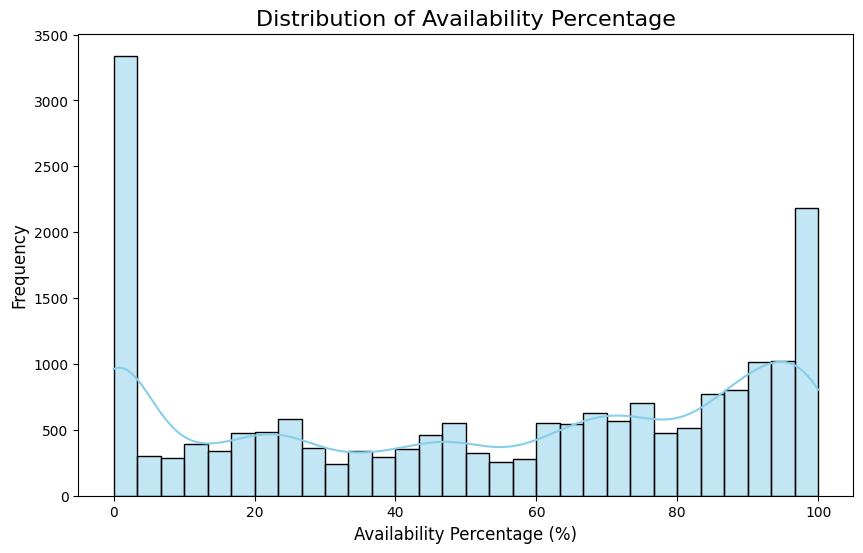

In [ ]:
# Compute percentage of availability for the year (availability_365)
df_barcelona['availability_percentage'] = (df_barcelona['availability_365'] / 365) * 100

# Display the new availability_percentage column
print("\nFirst 5 rows with availability percentage:")
print(df_barcelona[['availability_365', 'availability_percentage']].head())

# Visualizing availability percentage distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_barcelona['availability_percentage'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Availability Percentage', fontsize=16)
plt.xlabel('Availability Percentage (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
